In [1]:
from mario_replays.load_data import load_replay_data
import os
import pandas as pd
from mario_scenes.load_data import load_background_images
from mario_scenes.load_data import load_scenes_info

sourcedata = '../../mario_learning.behavior/sourcedata/'

In [2]:
clips_df = load_replay_data(os.path.join(sourcedata, 'scene_clips'), type='metadata')
clips_variables = load_replay_data(os.path.join(sourcedata, 'scene_clips'), type='variables')

repetitions_df = load_replay_data(os.path.join(sourcedata, 'replays'), type='metadata')
repetitions_variables = load_replay_data(os.path.join(sourcedata, 'replays'), type='variables')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_moving_average_simple(df, variable_col, index_col, grouping_col, filter_col, filter_value, figsize=(12, 6), window_size=5):
    """
    Plots a moving average of a variable for a specific filter value, grouped by another column.
    The x-axis is the rank-order of observations (0, 1, 2, ...) regardless of original index_col values.

    Args:
        df (pd.DataFrame): Your input DataFrame.
        variable_col (str): The column name of the variable to plot (Y-axis).
        index_col (str): The column name used to sort each group (but not shown on x-axis).
        grouping_col (str): The column name to group by and color lines (e.g., 'Subject').
        filter_col (str): The column name to filter by (e.g., 'LevelFullName').
        filter_value (str or int): The specific value to keep in the filter_col.
        window_size (int, optional): The window size for the moving average. Defaults to 5.

    Raises:
        ValueError: If required columns are missing or filter_value yields no data.
        TypeError: If variable_col is not numeric.
    """
    # --- Input Validation ---
    required_cols = [variable_col, index_col, grouping_col, filter_col]
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing required columns: {', '.join(missing_cols)}")

    if not pd.api.types.is_numeric_dtype(df[variable_col]):
        raise TypeError(f"Variable column '{variable_col}' must be numeric.")

    # --- Data Filtering ---
    filtered_df = df[df[filter_col] == filter_value].copy()
    if filtered_df.empty:
        raise ValueError(f"No data found for filter value '{filter_value}' in column '{filter_col}'.")

    # --- Plotting ---
    plt.figure(figsize=figsize)
    unique_groups = sorted(filtered_df[grouping_col].unique())
    colors = sns.color_palette("Set2", n_colors=len(unique_groups))

    plot_successful = False
    for i, group_value in enumerate(unique_groups):
        group_df = filtered_df[filtered_df[grouping_col] == group_value].copy()
        group_df = group_df.sort_values(index_col).reset_index(drop=True)
        group_df["relative_x"] = range(len(group_df))  # This is your [0,1,2,...] axis

        if group_df.empty:
            continue

        # Calculate and plot moving average or raw data
        if len(group_df) >= window_size:
            moving_avg = group_df[variable_col].rolling(window=window_size, min_periods=window_size).mean()
            plt.plot(group_df["relative_x"], moving_avg, label=f"{grouping_col} {group_value}", color=colors[i], marker=None)
            plot_successful = True
        else:
            print(f"Warning: Not enough data points (found {len(group_df)}, need {window_size}) for {grouping_col} {group_value}. Plotting raw data.")
            plt.plot(group_df["relative_x"], group_df[variable_col], label=f"{grouping_col} {group_value} (Raw)", color=colors[i], marker='.', linestyle='--')
            plot_successful = True

    # --- Final Plot Setup ---
    if plot_successful:
        plt.xlabel("Order")
        plt.ylabel(f"Moving Average of {variable_col} (Window={window_size})")
        plt.title(f"Moving Average of {variable_col} for {filter_col} = {filter_value}\nGrouped by {grouping_col}")
        plt.legend(title=grouping_col.capitalize())
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid data points found to plot for filter value '{filter_value}'.")
        plt.close()


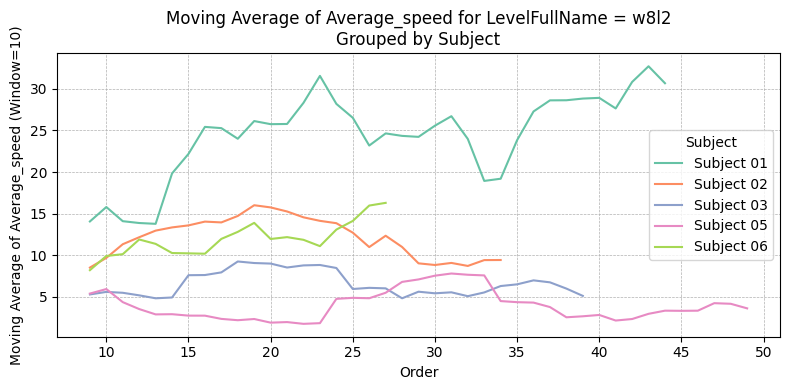

In [4]:
plot_moving_average_simple(
    df=repetitions_df,
    variable_col='Average_speed',
    index_col='IndexGlobal',      # Use the exact column name from your repetitions_df
    grouping_col='Subject',
    filter_col='LevelFullName', # Use the exact column name
    filter_value='w8l2',
    window_size=10,
    figsize=(8,4)
)

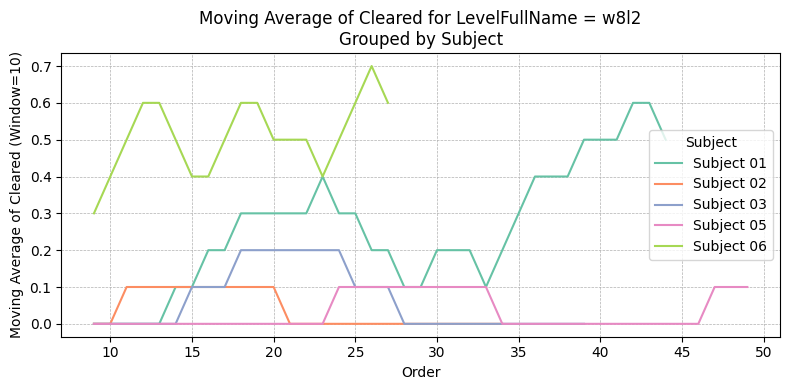

In [5]:
plot_moving_average_simple(
    df=repetitions_df,
    variable_col='Cleared',
    index_col='IndexGlobal',      # Use the exact column name from your repetitions_df
    grouping_col='Subject',
    filter_col='LevelFullName', # Use the exact column name
    filter_value='w8l2',
    window_size=10,
    figsize=(8,4)
)

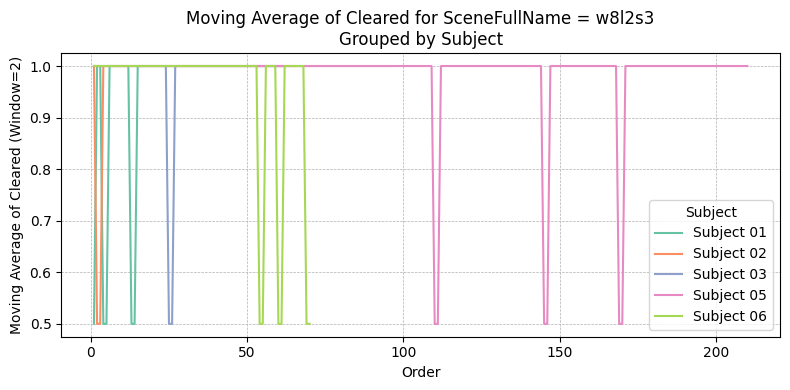

In [12]:
plot_moving_average_simple(
    df=clips_df,
    variable_col='Cleared',
    index_col='ClipCode',      # Use the exact column name from your repetitions_df
    grouping_col='Subject',
    filter_col='SceneFullName', # Use the exact column name
    filter_value='w8l2s3',
    window_size=2,
    figsize=(8,4)
)

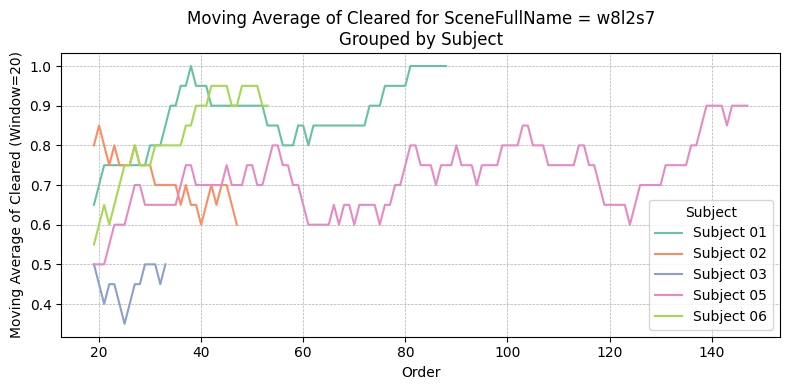

In [25]:
plot_moving_average_simple(
    df=clips_df,
    variable_col='Cleared',
    index_col='ClipCode',      # Use the exact column name from your repetitions_df
    grouping_col='Subject',
    filter_col='SceneFullName', # Use the exact column name
    filter_value='w8l2s7',
    window_size=20,
    figsize=(8,4)
)